In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install --upgrade category_encoders
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import category_encoders as ce
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

Mounted at /content/drive
     |████████████████████████████████| 81kB 4.5MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#import train data - convert exel to csv

train = pd.read_excel(r'/content/train.xlsx')
train.to_csv(r'/content/drive/MyDrive/train.csv', index = None, header=True)
train.head()

test = pd.read_excel(r'/content/test.xlsx')
test.to_csv(r'/content/drive/MyDrive/test.csv', index = None, header=True)



*   Dropped columns regarding their unique label count 
*   Dropped columns which had 1 unique label or more than 1000 unique labels which do not have high correlation with our target variable
*   Dropped columns which had more than 60% of empty rows (NaN Value) and replaced remaining NaN values with mode of the columns



In [ ]:
droppedcols = []
droppedcols = train.isnull().mean() < .6

test_ID= test['ID']

train = train.loc[:, droppedcols]
test =  test.loc[:, droppedcols]

test.drop('ID', axis='columns', inplace=True)
train.drop('ID', axis='columns', inplace=True)
test.drop(['PastJobTitlesSelect',  'MLToolNextYearSelect', 'MLTechniquesSelect'], axis='columns', inplace=True)
train.drop(['PastJobTitlesSelect',  'MLToolNextYearSelect', 'MLTechniquesSelect'], axis='columns', inplace=True)

# replace nan values with mode for test and train
for column in train.columns:
    train[column].fillna(train[column].mode()[0], inplace=True)

for column in test.columns:
    test[column].fillna(test[column].mode()[0], inplace=True)

# Mapping Ordinal

Mapped attributes which has a inherit relationship
(Ordinal Categories)


In [ ]:
EmployerSize = {'10,000 or more employees' :8,'1,000 to 4,999 employees':6,'5,000 to 9,999 employees':7,'500 to 999 employees':5,'Fewer than 10 employees' :1, '10 to 19 employees': 2, "I don/'t know": 0,'20 to 99 employees':3, '100 to 499 employees':4, 'I prefer not to answer':0 }

train['EmployerSize'] = train['EmployerSize'].replace(EmployerSize)
test['EmployerSize'] = test['EmployerSize'].replace(EmployerSize)


frequency =  {'Always':6, 'Rarely':2, 'Sometimes':3, 'Often':5, 'Most of the time':4, 'Never':0, "Don't know":1}

#train
train['WorkProductionFrequency'] = train['WorkProductionFrequency'].replace(frequency)
train['WorkToolsFrequencyPython'] = train['WorkToolsFrequencyPython'].replace(frequency)
train['WorkToolsFrequencyR'] = train['WorkToolsFrequencyR'].replace(frequency)
train['WorkToolsFrequencySQL'] = train['WorkToolsFrequencySQL'].replace(frequency)
train['WorkMethodsFrequencyCross-Validation'] = train['WorkMethodsFrequencyCross-Validation'].replace(frequency)
train['WorkMethodsFrequencyDataVisualization'] = train['WorkMethodsFrequencyDataVisualization'].replace(frequency)
train['WorkMethodsFrequencyDecisionTrees'] = train['WorkMethodsFrequencyDecisionTrees'].replace(frequency)
train['WorkMethodsFrequencyLogisticRegression'] = train['WorkMethodsFrequencyLogisticRegression'].replace(frequency)
train['WorkMethodsFrequencyRandomForests'] = train['WorkMethodsFrequencyRandomForests'].replace(frequency)
train['WorkMethodsFrequencyTimeSeriesAnalysis'] = train['WorkMethodsFrequencyTimeSeriesAnalysis'].replace(frequency)
train['WorkChallengeFrequencyTalent'] = train['WorkChallengeFrequencyTalent'].replace(frequency)
train['RemoteWork'] = train['RemoteWork'].replace(frequency)

#test
test['WorkProductionFrequency'] = test['WorkProductionFrequency'].replace(frequency)
test['WorkToolsFrequencyPython'] = test['WorkToolsFrequencyPython'].replace(frequency)
test['WorkToolsFrequencyR'] = test['WorkToolsFrequencyR'].replace(frequency)
test['WorkToolsFrequencySQL'] = test['WorkToolsFrequencySQL'].replace(frequency)
test['WorkMethodsFrequencyCross-Validation'] = test['WorkMethodsFrequencyCross-Validation'].replace(frequency)
test['WorkMethodsFrequencyDataVisualization'] = test['WorkMethodsFrequencyDataVisualization'].replace(frequency)
test['WorkMethodsFrequencyDecisionTrees'] = test['WorkMethodsFrequencyDecisionTrees'].replace(frequency)
test['WorkMethodsFrequencyLogisticRegression'] = test['WorkMethodsFrequencyLogisticRegression'].replace(frequency)
test['WorkMethodsFrequencyRandomForests'] = test['WorkMethodsFrequencyRandomForests'].replace(frequency)
test['WorkMethodsFrequencyTimeSeriesAnalysis'] = test['WorkMethodsFrequencyTimeSeriesAnalysis'].replace(frequency)
test['WorkChallengeFrequencyTalent'] = test['WorkChallengeFrequencyTalent'].replace(frequency)
test['RemoteWork'] = test['RemoteWork'].replace(frequency)

usefulness = {'Very useful':2, 'Somewhat useful':1, 'Not Useful':0}

#train
train['LearningPlatformUsefulnessBlogs'] = train['LearningPlatformUsefulnessBlogs'].replace(usefulness)
train['LearningPlatformUsefulnessKaggle'] = train['LearningPlatformUsefulnessKaggle'].replace(usefulness)
train['LearningPlatformUsefulnessCourses'] = train['LearningPlatformUsefulnessCourses'].replace(usefulness)
train['LearningPlatformUsefulnessProjects'] = train['LearningPlatformUsefulnessProjects'].replace(usefulness)
train['LearningPlatformUsefulnessSO'] = train['LearningPlatformUsefulnessSO'].replace(usefulness)
train['LearningPlatformUsefulnessYouTube'] = train['LearningPlatformUsefulnessYouTube'].replace(usefulness)

#test
test['LearningPlatformUsefulnessBlogs'] = test['LearningPlatformUsefulnessBlogs'].replace(usefulness)
test['LearningPlatformUsefulnessKaggle'] = test['LearningPlatformUsefulnessKaggle'].replace(usefulness)
test['LearningPlatformUsefulnessCourses'] = test['LearningPlatformUsefulnessCourses'].replace(usefulness)
test['LearningPlatformUsefulnessProjects'] = test['LearningPlatformUsefulnessProjects'].replace(usefulness)
test['LearningPlatformUsefulnessSO'] = test['LearningPlatformUsefulnessSO'].replace(usefulness)
test['LearningPlatformUsefulnessYouTube'] = test['LearningPlatformUsefulnessYouTube'].replace(usefulness)


dict = {'Yes':2, 'Sort of (Explain more)':1, 'No':0}
train['DataScienceIdentitySelect'] = train['DataScienceIdentitySelect'].replace(dict)
test['DataScienceIdentitySelect'] = test['DataScienceIdentitySelect'].replace(dict)

WorkDataVisualizations = {'51-75% of projects':4, '100% of projects':6, '10-25% of projects':2,'76-99% of projects':5, 'Less than 10% of projects':1, '26-50% of projects':3,'None':0}
train['WorkDataVisualizations'] = train['WorkDataVisualizations'].replace(dict)
test['WorkDataVisualizations'] = test['WorkDataVisualizations'].replace(dict)


tenure_map ={'More than 10 years':5, '6 to 10 years':4,'3 to 5 years':3,'1 to 2 years':2,'Less than a year':1,'I don\'t write code to analyze data':3}
train['Tenure']=train['Tenure'].replace(tenure_map)
test['Tenure']=test['Tenure'].replace(tenure_map)

title_map={'Fine':2, 'Poorly':1, 'Perfectly':3}
train['TitleFit']=train['TitleFit'].replace(title_map)
test['TitleFit']=test['TitleFit'].replace(title_map)

# Create list from columns convert them into seperate columns

Created new columns out of the attributes which consisted of lists
‘Past Job Titles Select’ , ‘ML Skills Select

Target variable was determined as new


In [ ]:
namelist = ['WorkAlgorithmsSelect', 'MLSkillsSelect']

# Change seperator

for var in namelist:  
  train[var] = train[var].str.replace('/','-')

for var in namelist: 
  test[var] = test[var].str.replace('/','-')

# Split

for var in namelist: 
  train[var] = train[var].str.split(',')
for var in namelist: 
  test[var] = test[var].str.split(',')

# Handle overlapped labels

counter = 0
for var in namelist:
  counter += 1
  for ind in train.index:
    for i in range(len(train[var][ind])) :
       train[var][ind][i] += str(counter)

counter = 0
for var in namelist:
  counter += 1
  for ind in test.index:
    for i in range(len(test[var][ind])) :
      test[var][ind][i] += str(counter)


# One hot encode

for var in namelist:
  mlb = MultiLabelBinarizer(sparse_output=True)
  train = train.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(train.pop(var)),
                index=train.index,
                columns=mlb.classes_))
  
for var in namelist:
  mlb = MultiLabelBinarizer(sparse_output=True)
  test = test.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(test.pop(var)),
                index=test.index,
                columns=mlb.classes_))

# Split test data

In [ ]:
y_train = train['JobSatisfaction']
X_train = train.drop(['JobSatisfaction'], axis=1)
X_test = test

In [ ]:
# Get missing columns in the training test

missing_cols = set( X_train.columns ) - set( X_test.columns )
# Add a missing column in test set with default value equal to 0
for c in missing_cols:
    X_test[c] = 0
# Ensure the order of column in the test set is in the same order than in train set
X_test = X_test[X_train.columns]

# One hot encoding

perform a basic one hot encoding of categorical features


In [ ]:
categorical = [var for var in X_train.columns if X_train[var].dtype=='O']


#encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=categorical)
                          
X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

#X_train.head()

corr = X_train.apply(lambda x: x.corr(y_train))
corr

highcorrelation =[]

for index_val, series_val in corr.iteritems():
  if ( 0 > series_val < -0.009  or 0.009 <series_val> 0):
    highcorrelation.append(True)
  else:
    highcorrelation.append(False)
highcorrelation

X_train = X_train.loc[:, highcorrelation]
X_test =  X_test.loc[:, highcorrelation]

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


# Feature Scaling

Perform feature scaling

In [ ]:
# Import `StandardScaler` from `sklearn.preprocessing`
from sklearn.preprocessing import MinMaxScaler

# Define the scaler 
scaler = MinMaxScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

# Gradient Boost Regressor - Our Best Result

In [ ]:
cross_validation = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

In [ ]:
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[500,1000,2000,300],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=cross_validation)
search.fit(X_train,y_train)

In [ ]:
search.best_params_

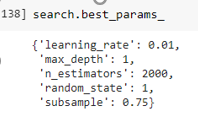

**Best parameters are (n_estimators=2000,learning_rate=0.01,subsample=.75,max_depth=1,random_state=1) acording to grid search**

In [ ]:
GBR=GradientBoostingRegressor(n_estimators=2000,learning_rate=0.01,subsample=.75,max_depth=1,random_state=1) #use best parameters

In [ ]:
GBR.fit(X_train,y_train.values.ravel())

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.01, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=1, subsample=0.75, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_pred = GBR.predict(X_train)

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt
scores = cross_val_score(GBR, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print("Root Mean Square Error (RMSE)  of mean of the cross validation score is " + str(sqrt(-1 * scores.mean())))

Root Mean Square Error (RMSE)  of mean of the cross validation score is 2.0060102251564653


In [ ]:
df = pd.DataFrame(y_pred, columns=['Prediction'])
df['ID'] = range(1, 1+len(df))
df = df[['ID', 'Prediction']]
prediction = df.to_csv(r'/content/drive/MyDrive/submission.csv', index = None, header=True)

**Root Mean Square Error (RMSE)  of mean of the cross validation score is 2.0060102251564653**

**Root Mean Square Error (RMSE)  of y_test is 1.96966**


# Random Forest Regression

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = 1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.2s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True 
[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=30, bootstrap=True, total=   3.2s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   8.8s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True, total=   8.9s
[CV] n_estimators=2000, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=10, bootstrap=True 
[CV]  n_estimators=2000, min_sa

In [ ]:
rf_random.best_params_

In [ ]:
# extract the numerical values of feature importance from the grid search
importances = rf_random.best_estimator_.feature_importances_

#create a feature list from the original dataset (list of columns)
# What are this numbers? Let's get back to the columns of the original dataset
feature_list = list(X.columns)

#create a list of tuples
feature_importance= sorted(zip(importances, feature_list), reverse=True)

#create two lists from the previous list of tuples
df = pd.DataFrame(feature_importance, columns=['importance', 'feature'])
importance= list(df['importance'])
feature= list(df['feature'])

#see df
print(df)

In [ ]:
# Set the style
plt.style.use('bmh')
# list of x locations for plotting
x_values = list(range(len(feature_importance)))

# Make a bar chart
plt.figure(figsize=(15,10))
plt.bar(x_values, importance, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [ ]:
max_depths = np.linspace(1, 50, 50, endpoint=True)

train_results = []
test_results = []

for i in max_depths:
    dt = RandomForestRegressor(max_depth=i)
    dt.fit(x_train, y_train)    
    #compute accuracy for train data
    housing_tree = dt.predict(x_train)
    errors = abs(housing_tree - y_train)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_train)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    train_results.append(accuracy)
    
    #now again for test data
    housing_tree = dt.predict(x_test)
    errors = abs(housing_tree - y_test)
    # Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
    # Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    #append results of accuracy
    test_results.append(accuracy)
    
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_depths, train_results, 'b', label='Train accuracy')
line2, = plt.plot(max_depths, test_results, 'r', label= 'Test accuracy')

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('Accuracy score')
plt.xlabel('Tree depth')

Best parameters are : (n_estimators = 1400, max_depth = None, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5 )

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators = 1400, max_depth = None, max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 5 )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

cross_val_score(model, X_train, y_train, cv=3)


array([0.09622062, 0.12223108, 0.09750109])

In [ ]:
from sklearn.model_selection import train_test_split
from math import sqrt
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print("Root Mean Square Error (RMSE)  of mean of the cross validation score is " + str(sqrt(-1 * scores.mean())))

Root Mean Square Error (RMSE)  of mean of the cross validation score is 2.0327568412622505


In [ ]:
df = pd.DataFrame(y_pred, columns=['Prediction'])
df['ID'] = test_ID
df = df[['ID', 'Prediction']]
prediction = df.to_csv(r'/content/drive/MyDrive/submission.csv', index = None, header=True)

# KNeighborsRegressor

In [ ]:
cv_method = RepeatedKFold(n_splits=5, n_repeats=3, random_state=999)

Data = StandardScaler().fit_transform(X_train)

knn_regressor = KNeighborsRegressor()

params_knn_regressor = {'n_neighbors': [60,65,70,80,100], 'p': [1, 2, 5]}

gs_knn_regressor = GridSearchCV(estimator=knn_regressor, param_grid=params_knn_regressor, verbose=1, cv=cv_method)

gs_knn_regressor.fit(X_train, y_train);

Fitting 15 folds for each of 15 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:  2.9min finished


In [ ]:
gs_knn_regressor.best_params_

{'n_neighbors': 80, 'p': 1}

In [ ]:
knn = KNeighborsRegressor(n_neighbors=80,p=1)
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=80, p=1,
                    weights='uniform')

In [ ]:
from sklearn.model_selection import train_test_split
scores = cross_val_score(knn, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print("Root Mean Square Error (RMSE)  of mean of the cross validation score is " + str(sqrt(-1 * scores.mean())))

Root Mean Square Error (RMSE)  of mean of the cross validation score is 2.0644345761356817


In [ ]:
gs_knn_regressor.cv_results_['mean_test_score']
results_KNN = pd.DataFrame(gs_knn_regressor.cv_results_['params'])
results_KNN['test_score'] = gs_knn_regressor.cv_results_['mean_test_score']
results_KNN['metric'] = results_KNN['p'].replace([1,2,5], ["Manhattan", "Euclidean", "Minkowski"])
results_KNN

,n_neighbors,p,test_score,metric
0,60,1,0.061800,Manhattan
1,60,2,0.056157,Euclidean
2,60,5,0.055144,Minkowski
3,65,1,0.061741,Manhattan
4,65,2,0.059390,Euclidean
5,65,5,0.055058,Minkowski
6,70,1,0.064411,Manhattan
7,70,2,0.060015,Euclidean
8,70,5,0.056247,Minkowski
9,80,1,0.065723,Manhattan


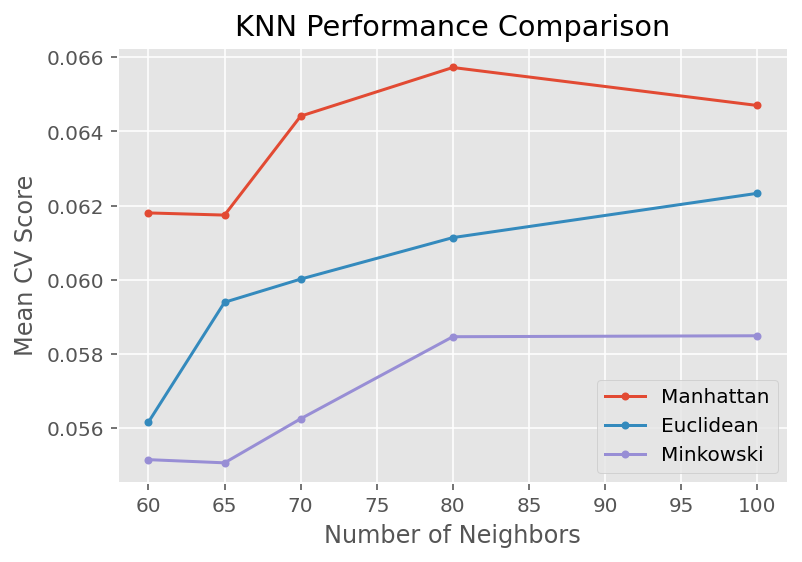

In [ ]:
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")

for i in ["Manhattan", "Euclidean", "Minkowski"]:
    temp = results_KNN[results_KNN['metric'] == i]
    plt.plot(temp['n_neighbors'], temp['test_score'], marker = '.', label = i)
    
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel("Mean CV Score")
plt.title("KNN Performance Comparison")
plt.show()

# SVC

In [ ]:
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
from sklearn.metrics import classification_report, confusion_matrix  
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from math import sqrt
from sklearn.metrics import mean_squared_error 

Using grid search as an approach to hyper-parameter tuning 

In [ ]:
from sklearn.model_selection import GridSearchCV 
from sklearn.svm import SVC

In [ ]:

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=  18.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.1s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.221, total=  18.1s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   36.2s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=  18.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=  17.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.220, total=  17.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.218, total=  16.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.222, total=  16.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.221, total=  16.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.224, total=  16.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 33.0min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [ ]:
# print best parameter after tuning 
print(grid.best_params_) 
  
# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
from sklearn.svm import SVC
svc = SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False).fit(X_train,y_train)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test) 


In [ ]:
from math import sqrt
scores = cross_val_score(svc, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
print("Root Mean Square Error (RMSE)  of mean of the cross validation score is " + str(sqrt(-1 * scores.mean())))

Root Mean Square Error (RMSE)  of mean of the cross validation score is 2.2453504943475955
